In [2]:
!pip install opencv-python matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable


🧠 Tumor size detected: Width = 22.00 mm, Height = 23.50 mm


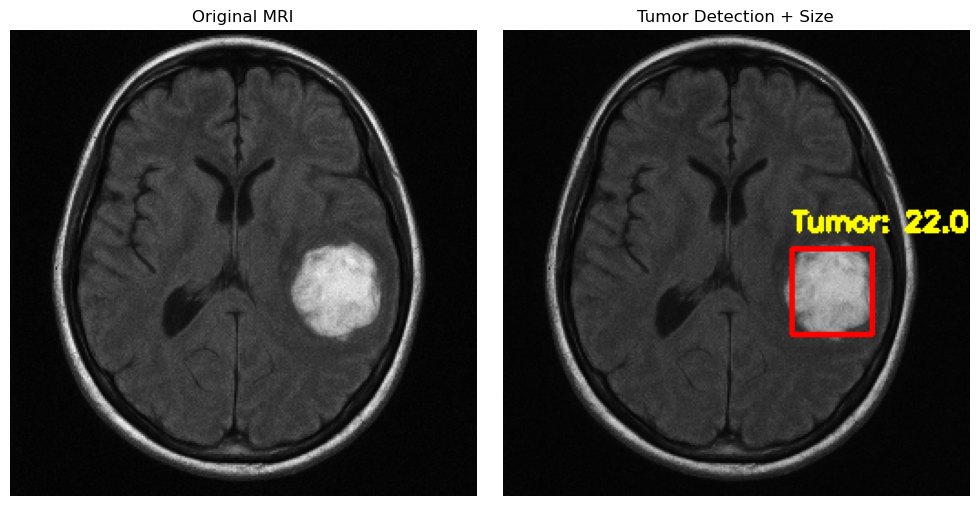

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def detect_brain_tumor_with_size(image_path, pixel_spacing=0.5):
    # Step 1: Read image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Could not read the image.")
        return

    # Step 2: Resize image for uniformity
    img = cv2.resize(img, (256, 256))

    # Step 3: Blur to reduce noise
    blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Step 4: Threshold to segment bright tumor regions
    _, thresh = cv2.threshold(blurred, 130, 255, cv2.THRESH_BINARY)

    # Step 5: Morphological operations to clean mask
    kernel = np.ones((5, 5), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Step 6: Find contours
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Convert grayscale to BGR for color drawing
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    tumor_found = False
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 300:
            tumor_found = True
            x, y, w, h = cv2.boundingRect(contour)
            tumor_width_mm = w * pixel_spacing
            tumor_height_mm = h * pixel_spacing

            cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 0, 255), 2)
            label = f"Tumor: {tumor_width_mm:.1f}mm x {tumor_height_mm:.1f}mm"
            cv2.putText(img_color, label, (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

            print(f"🧠 Tumor size detected: Width = {tumor_width_mm:.2f} mm, Height = {tumor_height_mm:.2f} mm")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original MRI")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Tumor Detection + Size")
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    if not tumor_found:
        print("❌ No tumor detected in the image.")

# ---- MAIN ----
if __name__ == "__main__":
    image_path = input("Enter path to brain MRI image: ").strip()
    if os.path.exists(image_path):
        detect_brain_tumor_with_size(image_path)
    else:
        print("❌ Image path not found.")


C:/PROJECT/brain.png